# 머신러닝을 이용한 자동차 가격 예측
### 탐색적 데이터 분석
* 데이터 개요(데이터 개수, 컬럼 개수, 데이터 유형 등) 확인
* 결측치/이상치 확인
* 데이터 시각화

### 피처엔지니어링 
* 인코딩
* 표준화(스케일링)

### 데이터 구조
* ID : 샘플 별 고유 id
* 생산년도 : 차량이 생산된 연도
* 모델출시년도 : 차량의 모델이 처음으로 출시된 연도
* 브랜드
* 차량모델명
* 판매도시 : 3글자로 인코딩된 도시 이름
* 판매구역 : 3글자로 인코딩된 구역 이름
* 주행거리 : 총 주행 거리(km)
* 배기량 : 내연기관에서 피스톤이 최대로 밀어내거나 빨아들이는 부피 (cc)
* 압축천연가스(CNG) : 압축천연가스(CNG) 자동차 여부
* 경유 : 경유 자동차 여부
* 가솔린 : 가솔린 자동차 여부
* 하이브리드 : 하이브리드 자동차 여부
* 액화석유가스(LPG) : 액화석유가스(LPG) 자동차 여부
* 가격 : 자동차 가격(백만원)

### 데이터 총 52,920개
* car_train.csv

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

from matplotlib import font_manager

from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor # 과반수 투표(Majority Voting) 
from sklearn.ensemble import BaggingRegressor # 배깅(Bagging)
from sklearn.ensemble import AdaBoostRegressor

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.neural_network import MLPRegressor

In [2]:
font_path = "C:/Windows/Fonts/malgun.ttf"
font_family = font_manager.FontProperties(fname=font_path).get_name()
plt.rcParams["font.family"] = font_family
plt.rcParams["axes.unicode_minus"] = False

In [3]:
car = pd.read_csv("car_train.csv")
car

,ID,생산년도,모델출시년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격
0,TRAIN_00000,2018,2014,skoda,fabia,KAT,SLA,85231,999,0,0,1,0,0,51.74
1,TRAIN_00001,2010,2006,toyota,auris,RKO,SWI,135000,1598,0,0,1,0,0,41.47
2,TRAIN_00002,2002,2002,mercedes-benz,clk-klasa,GNI,WIE,255223,1796,0,0,1,0,0,17.81
3,TRAIN_00003,2006,2001,nissan,x-trail,EHX,WIE,238000,2184,0,1,0,0,0,18.20
4,TRAIN_00004,2007,2007,fiat,bravo,OSW,MAL,251000,1910,0,1,0,0,0,17.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57915,TRAIN_57915,2017,2011,mercedes-benz,b-klasa,POZ,WIE,64839,1461,0,1,0,0,0,116.87
57916,TRAIN_57916,2006,2005,opel,zafira,XOK,ZAC,299850,1796,0,0,1,0,0,15.47
57917,TRAIN_57917,2013,2003,fiat,punto,CIE,MAZ,112000,1368,0,0,1,0,0,21.97
57918,TRAIN_57918,2006,2004,opel,astra,ZRI,DOL,189321,1598,0,0,1,0,0,16.77


In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57920 entries, 0 to 57919
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           57920 non-null  object 
 1   생산년도         57920 non-null  int64  
 2   모델출시년도       57920 non-null  int64  
 3   브랜드          57920 non-null  object 
 4   차량모델명        57920 non-null  object 
 5   판매도시         57920 non-null  object 
 6   판매구역         57920 non-null  object 
 7   주행거리         57920 non-null  int64  
 8   배기량          57920 non-null  int64  
 9   압축천연가스(CNG)  57920 non-null  int64  
 10  경유           57920 non-null  int64  
 11  가솔린          57920 non-null  int64  
 12  하이브리드        57920 non-null  int64  
 13  액화석유가스(LPG)  57920 non-null  int64  
 14  가격           57920 non-null  float64
dtypes: float64(1), int64(9), object(5)
memory usage: 6.6+ MB


## 이상치 확인

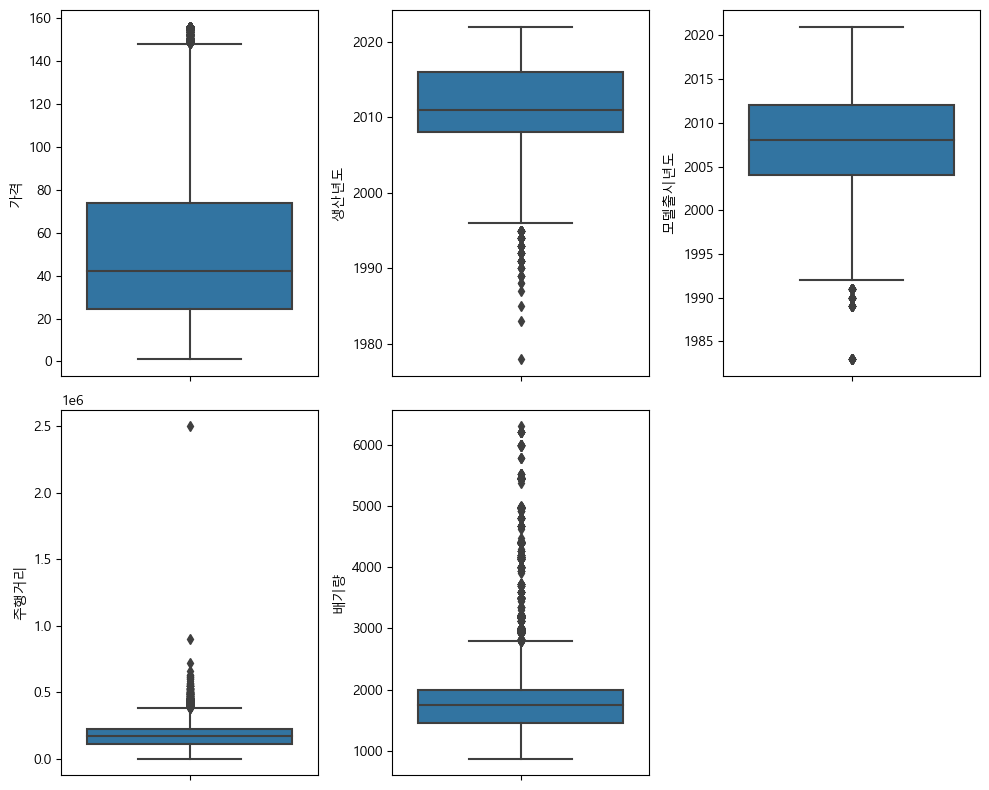

In [5]:
fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)

sns.boxplot(car, y="가격", ax=ax1)
sns.boxplot(car, y="생산년도", ax=ax2)
sns.boxplot(car, y="모델출시년도", ax=ax3)
sns.boxplot(car, y="주행거리", ax=ax4)
sns.boxplot(car, y="배기량", ax=ax5)

plt.tight_layout()
plt.show()

In [6]:
def calculate_fence(data, coef=1.5):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_fence = q1 - coef * iqr
    upper_fence = q3 + coef * iqr
    return lower_fence, upper_fence

### 가격 이상치 확인

In [7]:
lf, uf = calculate_fence(car['가격'])
outlier = car.loc[(car['가격'] < lf) | (car['가격'] > uf)].sort_values('가격')
outlier.head(10)

,ID,생산년도,모델출시년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격
23378,TRAIN_23378,2018,2015,audi,a4,POK,OPO,24150,1968,0,1,0,0,0,148.19
4590,TRAIN_04590,2013,2008,bmw,seria-7,BIA,POL,188000,2993,0,1,0,0,0,148.20
12063,TRAIN_12063,2019,2017,peugeot,5008,FSL,WIE,8500,1499,0,1,0,0,0,148.20
28379,TRAIN_28379,2020,2019,toyota,corolla,SYV,WIE,2400,1798,0,0,0,1,0,148.20
51110,TRAIN_51110,2019,2017,peugeot,5008,ZLO,WIE,135251,1997,0,1,0,0,0,148.20
1053,TRAIN_01053,2017,2011,audi,a6,PIL,WIE,106300,1968,0,1,0,0,0,148.20
47291,TRAIN_47291,2016,2014,bmw,x4,SIE,MAZ,205000,1995,0,1,0,0,0,148.20
34110,TRAIN_34110,2017,2014,nissan,x-trail,KAT,SLA,63000,1995,0,1,0,0,0,148.20
56936,TRAIN_56936,2020,2018,kia,ceed,WAR,MAZ,13450,1580,0,0,0,1,0,148.20
17225,TRAIN_17225,2018,2018,mercedes-benz,a-klasa,MIN,MAZ,54332,1461,0,1,0,0,0,148.20


In [8]:
outlier.tail(10)

,ID,생산년도,모델출시년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격
30482,TRAIN_30482,2014,2011,audi,a6,LLR,MAZ,132000,1968,0,1,0,0,0,156.0
30371,TRAIN_30371,2018,2014,volkswagen,passat,TOR,KUJ,94978,1968,0,1,0,0,0,156.0
29963,TRAIN_29963,2020,2014,volkswagen,passat,KQI,SLA,30000,1498,0,0,1,0,0,156.0
29417,TRAIN_29417,2016,2012,bmw,seria-3,CAA,WIE,109000,1995,0,1,0,0,0,156.0
28032,TRAIN_28032,2019,2013,skoda,octavia,KXH,POM,52190,1984,0,0,1,0,0,156.0
27064,TRAIN_27064,2018,2011,volvo,v60,CAY,SWI,180100,1969,0,1,0,0,0,156.0
26682,TRAIN_26682,2017,2014,bmw,x4,IUY,SLA,97500,1995,0,1,0,0,0,156.0
25165,TRAIN_25165,2016,2011,audi,a6,CIB,WAR,160760,1968,0,1,0,0,0,156.0
23248,TRAIN_23248,2015,2011,audi,a7,QES,WIE,129000,2967,0,1,0,0,0,156.0
57696,TRAIN_57696,2018,2017,peugeot,5008,RYB,SLA,149868,1997,0,1,0,0,0,156.0


### 주행거리 이상치 확인

In [9]:
lf, uf = calculate_fence(car['주행거리'])
outlier = car.loc[(car['주행거리'] < lf) | (car['주행거리'] > uf)].sort_values('주행거리')
outlier.head(10)

,ID,생산년도,모델출시년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격
7266,TRAIN_07266,2007,2006,ford,s-max,KAT,SLA,383000,1997,0,1,0,0,0,21.97
5913,TRAIN_05913,2008,2002,opel,vectra,TOR,KUJ,383000,1910,0,1,0,0,0,18.85
46770,TRAIN_46770,2008,2004,audi,a6,JMY,POM,383700,1968,0,1,0,0,0,22.75
47267,TRAIN_47267,2004,1997,audi,a6,PIN,SWI,383722,1968,0,1,0,0,0,13.00
26565,TRAIN_26565,2006,2003,toyota,avensis,WRO,DOL,384000,1998,0,0,1,0,0,12.35
5028,TRAIN_05028,1998,1997,volkswagen,golf,OST,WIE,384000,1896,0,1,0,0,0,4.22
730,TRAIN_00730,2012,2008,audi,q5,BYD,KUJ,384000,1968,0,1,0,0,0,70.07
18114,TRAIN_18114,2008,2004,audi,a6,DAB,SLA,384000,2967,0,1,0,0,0,46.15
19631,TRAIN_19631,2006,2005,bmw,seria-3,LSS,LOD,384000,1995,0,1,0,0,0,19.37
51627,TRAIN_51627,2008,2004,skoda,octavia,TOP,KUJ,384037,1896,0,1,0,0,0,16.64


In [10]:
outlier.tail(10)

,ID,생산년도,모델출시년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격
5812,TRAIN_05812,2010,2001,renault,trafic,SOS,SLA,602112,1998,0,0,1,0,0,29.77
26507,TRAIN_26507,2011,2008,skoda,superb,WAR,MAZ,611500,1984,0,0,1,0,0,33.80
57217,TRAIN_57217,2008,2002,mercedes-benz,e-klasa,PAW,SWI,617000,2148,0,1,0,0,0,37.05
55266,TRAIN_55266,2008,2007,volkswagen,tiguan,KAL,WIE,620000,1968,0,1,0,0,0,36.40
34462,TRAIN_34462,2015,2003,mercedes-benz,vito,ZSR,LUB,631000,2143,0,1,0,0,0,64.87
16290,TRAIN_16290,2008,2002,opel,vectra,PAN,SLA,631970,1910,0,1,0,0,0,15.59
27691,TRAIN_27691,2013,2006,mercedes-benz,sprinter,ILA,WAR,657130,2143,0,1,0,0,0,49.57
21390,TRAIN_21390,2007,2006,mercedes-benz,gl-klasa,KAR,LUU,720000,2987,0,1,0,0,0,55.90
57668,TRAIN_57668,2017,2014,mercedes-benz,vito,PIL,WIE,900000,2143,0,1,0,0,0,87.94
40808,TRAIN_40808,2014,2014,ford,mondeo,POZ,LUB,2500000,1999,0,0,0,1,0,30.94


In [11]:
outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 481 entries, 7266 to 40808
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           481 non-null    object 
 1   생산년도         481 non-null    int64  
 2   모델출시년도       481 non-null    int64  
 3   브랜드          481 non-null    object 
 4   차량모델명        481 non-null    object 
 5   판매도시         481 non-null    object 
 6   판매구역         481 non-null    object 
 7   주행거리         481 non-null    int64  
 8   배기량          481 non-null    int64  
 9   압축천연가스(CNG)  481 non-null    int64  
 10  경유           481 non-null    int64  
 11  가솔린          481 non-null    int64  
 12  하이브리드        481 non-null    int64  
 13  액화석유가스(LPG)  481 non-null    int64  
 14  가격           481 non-null    float64
dtypes: float64(1), int64(9), object(5)
memory usage: 60.1+ KB


## 이상치 드랍

In [12]:
# lf, uf = calculate_fence(car['가격'])
# outlier = car.loc[(car['가격'] < lf) | (car['가격'] > uf)].sort_values('가격')
# revised_car = car.drop(outlier.index, axis=0)

# lf, uf = calculate_fence(revised_car['주행거리'])
# outlier = revised_car.loc[(car['주행거리'] < lf) | (revised_car['주행거리'] > uf)]
# revised_car = revised_car.drop(outlier.index, axis=0)

# lf, uf = calculate_fence(revised_car['배기량'])
# outlier = revised_car.loc[(revised_car['배기량'] < lf) | (revised_car['배기량'] > uf)]
# revised_car = revised_car.drop(outlier.index, axis=0)

# lf, uf = calculate_fence(revised_car['생산년도'])
# outlier = revised_car.loc[(revised_car['생산년도'] < lf) | (revised_car['생산년도'] > uf)]
# revised_car = revised_car.drop(outlier.index, axis=0)
# car.shape, revised_car.shape

## Feature Engineering

In [13]:
car['브랜드'].unique()

array(['skoda', 'toyota', 'mercedes-benz', 'nissan', 'fiat', 'audi',
       'renault', 'volkswagen', 'citroen', 'bmw', 'opel', 'ford', 'mazda',
       'honda', 'kia', 'seat', 'volvo', 'peugeot', 'hyundai',
       'mitsubishi'], dtype=object)

In [14]:
car['차량모델명'].unique().__len__()

143

In [15]:
car['판매도시'].unique().__len__()

3224

In [16]:
car['판매구역'].unique().__len__()

17

### Revise Car dataframe

In [17]:
revised_car = car.drop(['ID', '차량모델명', '판매도시', '판매구역'], axis=1)
revised_car

,생산년도,모델출시년도,브랜드,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격
0,2018,2014,skoda,85231,999,0,0,1,0,0,51.74
1,2010,2006,toyota,135000,1598,0,0,1,0,0,41.47
2,2002,2002,mercedes-benz,255223,1796,0,0,1,0,0,17.81
3,2006,2001,nissan,238000,2184,0,1,0,0,0,18.20
4,2007,2007,fiat,251000,1910,0,1,0,0,0,17.55
...,...,...,...,...,...,...,...,...,...,...,...
57915,2017,2011,mercedes-benz,64839,1461,0,1,0,0,0,116.87
57916,2006,2005,opel,299850,1796,0,0,1,0,0,15.47
57917,2013,2003,fiat,112000,1368,0,0,1,0,0,21.97
57918,2006,2004,opel,189321,1598,0,0,1,0,0,16.77


### Robust Scaling

In [18]:
numeric_col = revised_car.columns.difference(['가격', '브랜드'])
revised_car[numeric_col]

,가솔린,경유,모델출시년도,배기량,생산년도,압축천연가스(CNG),액화석유가스(LPG),주행거리,하이브리드
0,1,0,2014,999,2018,0,0,85231,0
1,1,0,2006,1598,2010,0,0,135000,0
2,1,0,2002,1796,2002,0,0,255223,0
3,0,1,2001,2184,2006,0,0,238000,0
4,0,1,2007,1910,2007,0,0,251000,0
...,...,...,...,...,...,...,...,...,...
57915,0,1,2011,1461,2017,0,0,64839,0
57916,1,0,2005,1796,2006,0,0,299850,0
57917,1,0,2003,1368,2013,0,0,112000,0
57918,1,0,2004,1598,2006,0,0,189321,0


In [19]:
rs_car = revised_car
rs = RobustScaler()
rs_car[numeric_col] = rs.fit_transform(revised_car[numeric_col])
rs_car

,생산년도,모델출시년도,브랜드,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격
0,0.875,0.750,skoda,-0.790021,-1.411985,0.0,0.0,0.0,0.0,0.0,51.74
1,-0.125,-0.250,toyota,-0.331597,-0.290262,0.0,0.0,0.0,0.0,0.0,41.47
2,-1.125,-0.750,mercedes-benz,0.775781,0.080524,0.0,0.0,0.0,0.0,0.0,17.81
3,-0.625,-0.875,nissan,0.617139,0.807116,0.0,1.0,-1.0,0.0,0.0,18.20
4,-0.500,-0.125,fiat,0.736882,0.294007,0.0,1.0,-1.0,0.0,0.0,17.55
...,...,...,...,...,...,...,...,...,...,...,...
57915,0.750,0.375,mercedes-benz,-0.977852,-0.546816,0.0,1.0,-1.0,0.0,0.0,116.87
57916,-0.625,-0.375,opel,1.186841,0.080524,0.0,0.0,0.0,0.0,0.0,15.47
57917,0.250,-0.625,fiat,-0.543451,-0.720974,0.0,0.0,0.0,0.0,0.0,21.97
57918,-0.625,-0.500,opel,0.168755,-0.290262,0.0,0.0,0.0,0.0,0.0,16.77


### MinMax Scaling

In [20]:
mm_car = revised_car
mm = MinMaxScaler()
mm_car[numeric_col] = mm.fit_transform(revised_car[numeric_col])
mm_car

,생산년도,모델출시년도,브랜드,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격
0,0.909091,0.815789,skoda,0.034092,0.022857,0.0,0.0,1.0,0.0,0.0,51.74
1,0.727273,0.605263,toyota,0.054000,0.133272,0.0,0.0,1.0,0.0,0.0,41.47
2,0.545455,0.500000,mercedes-benz,0.102089,0.169770,0.0,0.0,1.0,0.0,0.0,17.81
3,0.636364,0.473684,nissan,0.095200,0.241290,0.0,1.0,0.0,0.0,0.0,18.20
4,0.659091,0.631579,fiat,0.100400,0.190783,0.0,1.0,0.0,0.0,0.0,17.55
...,...,...,...,...,...,...,...,...,...,...,...
57915,0.886364,0.736842,mercedes-benz,0.025935,0.108018,0.0,1.0,0.0,0.0,0.0,116.87
57916,0.636364,0.578947,opel,0.119940,0.169770,0.0,0.0,1.0,0.0,0.0,15.47
57917,0.795455,0.526316,fiat,0.044800,0.090876,0.0,0.0,1.0,0.0,0.0,21.97
57918,0.636364,0.552632,opel,0.075728,0.133272,0.0,0.0,1.0,0.0,0.0,16.77


### OneHot Encoding

In [21]:
rs_car = pd.get_dummies(rs_car, dtype=int, columns=["브랜드"])
mm_car = pd.get_dummies(mm_car, dtype=int, columns=["브랜드"])

## 상관관계 확인

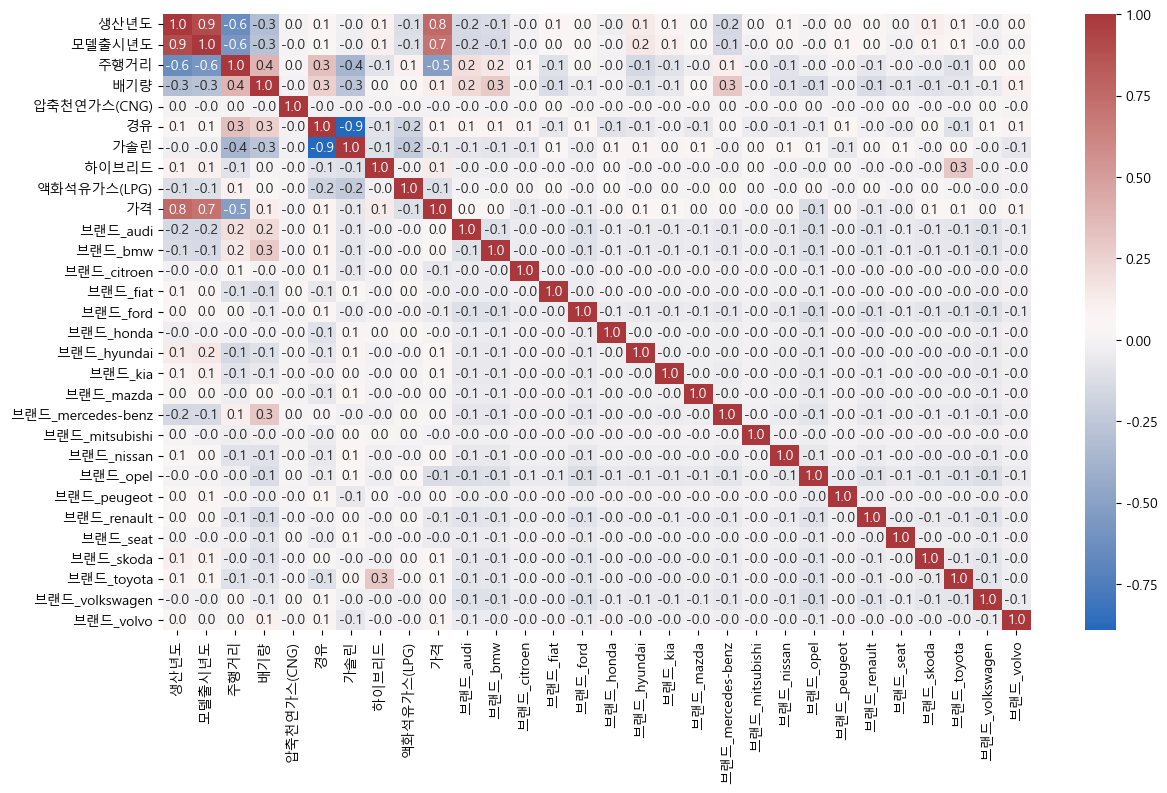

In [22]:
corr_mat = rs_car.corr()

fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(1,1,1)
sns.heatmap(corr_mat, annot=True, fmt=".1f", cmap="vlag", ax=ax)

plt.show()

## 주성분분석

In [23]:
feature_col = rs_car.columns.difference(['가격'])
# feature_col = ['생산년도', '모델출시년도', '주행거리', '배기량']

In [24]:
# PCA 모델 초기화
pca = PCA(n_components=3)  # 주성분 개수를 지정
pca_car = pd.DataFrame(pca.fit_transform(rs_car[feature_col]))
pca_car

,0,1,2
0,-0.644246,-0.076891,0.027217
1,-0.673744,-0.103620,-0.017324
2,-0.637603,-0.099921,-0.066553
3,0.743035,-0.018635,-0.023696
4,0.749072,-0.001625,-0.006008
...,...,...,...
57915,0.767548,-0.010226,-0.001290
57916,-0.679049,0.855300,0.014861
57917,-0.661000,-0.074091,-0.014326
57918,-0.681527,0.856447,0.015907


In [25]:
pd.DataFrame([feature_col, pca.components_[0].round(3).reshape(-1)]).T.sort_values(1)

,0,1
0,가솔린,-0.707
16,브랜드_opel,-0.036
21,브랜드_toyota,-0.028
9,브랜드_honda,-0.022
15,브랜드_nissan,-0.021
10,브랜드_hyundai,-0.021
12,브랜드_mazda,-0.019
19,브랜드_seat,-0.014
7,브랜드_fiat,-0.014
18,브랜드_renault,-0.01


## train_test_split

* data1 : robust scale, data2 : min_max scale
* data3 : pca data

In [26]:
feature_col

Index(['가솔린', '경유', '모델출시년도', '배기량', '브랜드_audi', '브랜드_bmw', '브랜드_citroen',
       '브랜드_fiat', '브랜드_ford', '브랜드_honda', '브랜드_hyundai', '브랜드_kia',
       '브랜드_mazda', '브랜드_mercedes-benz', '브랜드_mitsubishi', '브랜드_nissan',
       '브랜드_opel', '브랜드_peugeot', '브랜드_renault', '브랜드_seat', '브랜드_skoda',
       '브랜드_toyota', '브랜드_volkswagen', '브랜드_volvo', '생산년도', '압축천연가스(CNG)',
       '액화석유가스(LPG)', '주행거리', '하이브리드'],
      dtype='object')

In [27]:
print(feature_col)
# data1 : robust scale, data2 : min_max scale
x_data1 = rs_car[feature_col]
x_data2 = mm_car[feature_col]
y_data = rs_car['가격']

Index(['가솔린', '경유', '모델출시년도', '배기량', '브랜드_audi', '브랜드_bmw', '브랜드_citroen',
       '브랜드_fiat', '브랜드_ford', '브랜드_honda', '브랜드_hyundai', '브랜드_kia',
       '브랜드_mazda', '브랜드_mercedes-benz', '브랜드_mitsubishi', '브랜드_nissan',
       '브랜드_opel', '브랜드_peugeot', '브랜드_renault', '브랜드_seat', '브랜드_skoda',
       '브랜드_toyota', '브랜드_volkswagen', '브랜드_volvo', '생산년도', '압축천연가스(CNG)',
       '액화석유가스(LPG)', '주행거리', '하이브리드'],
      dtype='object')


In [28]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data1, y_data, test_size=0.2)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_data2, y_data, test_size=0.2)
x_train3, x_test3, y_train3, y_test3 = train_test_split(pca_car, y_data, test_size=0.2)

## Modeling

### LinearRegression

In [41]:
lr1 = LinearRegression()
lr1.fit(x_train1, y_train1)

lr2 = LinearRegression()
lr2.fit(x_train2, y_train2)

lr3 = LinearRegression()
lr3.fit(x_train3, y_train3)

LinearRegression()

In [42]:
rs_score = lr1.score(x_train1, y_train1)
mm_score = lr2.score(x_train2, y_train2)
pca_score = lr3.score(x_train3, y_train3)
print("train:", rs_score, mm_score, pca_score)

rs_score = lr1.score(x_test1, y_test1)
mm_score = lr2.score(x_test2, y_test2)
pca_score = lr3.score(x_test3, y_test3)
print("test:", rs_score, mm_score, pca_score)

train: 0.7787923691401575 0.7796253517210137 0.018324091648405094
test: 0.7810648582332691 0.7778089121839818 0.017934650299065713


### Decision Tree

In [43]:
dtr1 = DecisionTreeRegressor()
dtr1.fit(x_train1, y_train1)

dtr2 = DecisionTreeRegressor()
dtr2.fit(x_train2, y_train2)

dtr3 = DecisionTreeRegressor()
dtr3.fit(x_train3, y_train3)

DecisionTreeRegressor()

In [44]:
rs_score = dtr1.score(x_train1, y_train1)
mm_score = dtr2.score(x_train2, y_train2)
pca_score = dtr3.score(x_train3, y_train3)
print("train:", rs_score, mm_score, pca_score)

rs_score = dtr1.score(x_test1, y_test1)
mm_score = dtr2.score(x_test2, y_test2)
pca_score = dtr3.score(x_test3, y_test3)
print("test:", rs_score, mm_score, pca_score)

train: 0.9976793096812179 0.9978321374163103 0.9972183268861892
test: 0.8583895081801565 0.8594987299757949 0.8366141050064914


### RandomForest

In [45]:
rfr1 = RandomForestRegressor()
rfr1.fit(x_train1, y_train1)

rfr2 = RandomForestRegressor()
rfr2.fit(x_train2, y_train2)

rfr3 = RandomForestRegressor()
rfr3.fit(x_train3, y_train3)

RandomForestRegressor()

In [46]:
rs_score = rfr1.score(x_train1, y_train1)
mm_score = rfr2.score(x_train2, y_train2)
pca_score = rfr3.score(x_train3, y_train3)
print("train:", rs_score, mm_score, pca_score)

rs_score = rfr1.score(x_test1, y_test1)
mm_score = rfr2.score(x_test2, y_test2)
pca_score = rfr3.score(x_test3, y_test3)
print("test:", rs_score, mm_score, pca_score)

train: 0.9862311979250538 0.9863635035397721 0.9823215998135645
test: 0.9172193964341795 0.9151548787170494 0.8919307962503874


### KNeighbors

In [48]:
knn1 = KNeighborsRegressor()
knn1.fit(x_train1, y_train1)

knn2 = KNeighborsRegressor()
knn2.fit(x_train2, y_train2)

knn3 = KNeighborsRegressor()
knn3.fit(x_train3, y_train3)

KNeighborsRegressor()

In [49]:
rs_score = knn1.score(x_train1, y_train1)
mm_score = knn2.score(x_train2, y_train2)
pca_score = knn3.score(x_train3, y_train3)
print("train:", rs_score, mm_score, pca_score)

rs_score = knn1.score(x_test1, y_test1)
mm_score = knn2.score(x_test2, y_test2)
pca_score = knn3.score(x_test3, y_test3)
print("test:", rs_score, mm_score, pca_score)

train: 0.9454944469952429 0.9457262503707691 0.9321891125308995
test: 0.9200984765064444 0.9195454865168637 0.8943438400619289


### AdaBoost

In [60]:
ada1 = AdaBoostRegressor(n_estimators=100, learning_rate=0.1)
ada1.fit(x_train1, y_train1)

ada2 = AdaBoostRegressor(n_estimators=100, learning_rate=0.1)
ada2.fit(x_train2, y_train2)

ada3 = AdaBoostRegressor(n_estimators=100, learning_rate=0.1)
ada3.fit(x_train3, y_train3)

AdaBoostRegressor(learning_rate=0.1, n_estimators=100)

In [61]:
rs_score = ada1.score(x_train1, y_train1)
mm_score = ada2.score(x_train2, y_train2)
pca_score = ada3.score(x_train3, y_train3)
print("train:", rs_score, mm_score, pca_score)

rs_score = ada1.score(x_test1, y_test1)
mm_score = ada2.score(x_test2, y_test2)
pca_score = ada3.score(x_test3, y_test3)
print("test:", rs_score, mm_score, pca_score)

train: 0.7567007375539023 0.7554854375851627 0.17372518772362822
test: 0.7596553641550678 0.754903557702947 0.16603624710148757


### XGBoost

In [62]:
xgb1 = XGBRegressor()
xgb1.fit(x_train1, y_train1)

xgb2 = XGBRegressor()
xgb2.fit(x_train2, y_train2)

xgb3 = XGBRegressor()
xgb3.fit(x_train3, y_train3)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [63]:
rs_score = xgb1.score(x_train1, y_train1)
mm_score = xgb2.score(x_train2, y_train2)
pca_score = xgb3.score(x_train3, y_train3)
print("train:", rs_score, mm_score, pca_score)

rs_score = xgb1.score(x_test1, y_test1)
mm_score = xgb2.score(x_test2, y_test2)
pca_score = xgb3.score(x_test3, y_test3)
print("test:", rs_score, mm_score, pca_score)

train: 0.9418467139424327 0.9414874451528504 0.8990747397658151
test: 0.9256831590160784 0.9249151186750902 0.8676376889812871


### LightGBM

In [64]:
lgbm1 = LGBMRegressor()
lgbm1.fit(x_train1, y_train1)

lgbm2 = LGBMRegressor()
lgbm2.fit(x_train2, y_train2)

lgbm3 = LGBMRegressor()
lgbm3.fit(x_train3, y_train3)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000300 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 559
[LightGBM] [Info] Number of data points in the train set: 46336, number of used features: 29
[LightGBM] [Info] Start training from score 52.114331
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000329 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 556
[LightGBM] [Info] Number of data points in the train set: 46336, number of used features: 28
[LightGBM] [Info] Start training from score 52.234059
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is 

LGBMRegressor()

In [65]:
rs_score = lgbm1.score(x_train1, y_train1)
mm_score = lgbm2.score(x_train2, y_train2)
pca_score = lgbm3.score(x_train3, y_train3)
print("train:", rs_score, mm_score, pca_score)

rs_score = lgbm1.score(x_test1, y_test1)
mm_score = lgbm2.score(x_test2, y_test2)
pca_score = lgbm3.score(x_test3, y_test3)
print("test:", rs_score, mm_score, pca_score)

train: 0.9187516961716194 0.9193770957232006 0.8220511767092296
test: 0.9158373092668832 0.9155434611751552 0.8131786257829237


### SVM

In [67]:
# svr1 = SVR()
# svr1.fit(x_train1, y_train1)

# svr2 = SVR()
# svr2.fit(x_train2, y_train2)

# svr3 = SVR()
# svr3.fit(x_train3, y_train3)

SVR()

In [68]:
# rs_score = svr1.score(x_train1, y_train1)
# mm_score = svr2.score(x_train2, y_train2)
# pca_score = svr3.score(x_train3, y_train3)
# print("train:", rs_score, mm_score, pca_score)

# rs_score = svr1.score(x_test1, y_test1)
# mm_score = svr2.score(x_test2, y_test2)
# pca_score = svr3.score(x_test3, y_test3)
# print("test:", rs_score, mm_score, pca_score)

train: 0.7752623397982383 0.776363732473407 0.02771787963442951
test: 0.7742191538994713 0.774144612682784 0.028543457643075754


### Voting

In [74]:
models1 = [('rfc', RandomForestRegressor()),
          ('knn', KNeighborsRegressor()),
          ('xgb', XGBRegressor()),
          ('lgbm', LGBMRegressor())]
vote1 = VotingRegressor(models1)

models2 = [('rfc', RandomForestRegressor()),
          ('knn', KNeighborsRegressor()),
          ('xgb', XGBRegressor()),
          ('lgbm', LGBMRegressor())]
vote2 = VotingRegressor(models2)

In [75]:
vote1.fit(x_train1, y_train1)
vote2.fit(x_train3, y_train3)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000309 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 559
[LightGBM] [Info] Number of data points in the train set: 46336, number of used features: 29
[LightGBM] [Info] Start training from score 52.114331
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000207 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 46336, number of used features: 3
[LightGBM] [Info] Start training from score 52.229379


VotingRegressor(estimators=[('rfc', RandomForestRegressor()),
                            ('knn', KNeighborsRegressor()),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                    

In [77]:
rs_score = vote1.score(x_train1, y_train1)
pca_score = vote2.score(x_train3, y_train3)
print("train:", rs_score, pca_score)

rs_score = vote1.score(x_test1, y_test1)
pca_score = vote2.score(x_test3, y_test3)
print("test:", rs_score, pca_score)

train: 0.9583707341442901 0.933486338545139
test: 0.9300086199259744 0.8901746655896543


### MLP

In [85]:
mlp = MLPRegressor(max_iter=500)
mlp.fit(x_train1.values, y_train1.values)

C:\Users\medici\miniconda3\envs\deeplearning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPRegressor(max_iter=500)

In [86]:
mlp2 = MLPRegressor(max_iter=500)
mlp2.fit(x_train3.values, y_train3.values)

MLPRegressor(max_iter=500)

In [87]:
rs_score = mlp.score(x_train1, y_train1)
pca_score = mlp2.score(x_train3, y_train3)
print("train:", rs_score, pca_score)

rs_score = mlp.score(x_test1, y_test1)
pca_score = mlp2.score(x_test3, y_test3)
print("test:", rs_score, pca_score)

train: 0.8798330479151107 0.06074004992212978
test: 0.8818822810619158 0.06383170826876838


C:\Users\medici\miniconda3\envs\deeplearning\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\medici\miniconda3\envs\deeplearning\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [89]:
mlp = MLPRegressor(hidden_layer_sizes=(64,32,16), max_iter = 500)
mlp.fit(x_train1.values, y_train1.values)

MLPRegressor(hidden_layer_sizes=(64, 32, 16), max_iter=500)

In [90]:
rs_score = mlp.score(x_test1, y_test1)
rs_score

C:\Users\medici\miniconda3\envs\deeplearning\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.9045093453575629

## GridSearchCV

In [96]:
param_grid_knn = {
    'n_neighbors': [5],
    'weights': ['uniform', 'distance']
}

In [97]:
grid_cv_knn = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid_knn)
grid_cv_knn.fit(x_train1, y_train1)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [5],
                         'weights': ['uniform', 'distance']})

In [100]:
grid_cv_knn.best_params_

{'n_neighbors': 5, 'weights': 'uniform'}

In [99]:
rs_score = grid_cv_knn.best_estimator_.score(x_test1, y_test1)
rs_score

0.9200984765064444

## GridSearchCV 구현

### XGBoost

In [144]:
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.8, 0.9, 1.0]
}

In [145]:
params = {
    'tree_method': 'gpu_hist',  # GPU를 사용하도록 설정
    'gpu_id': 0  # 사용할 GPU 디바이스 ID 설정 (여러 개의 GPU가 있는 경우)
}

In [147]:
xgb_models = defaultdict(lambda : 
                         {'n_estimators': int, 'learning_rate': float,
                          'max_depth': int, 'min_child_weight': int, 'subsample': float})

In [148]:
for n_estimator in param_grid_xgb['n_estimators']:
    for learning_rate in param_grid_xgb['learning_rate']:
        for max_depth in param_grid_xgb['max_depth']:
            for min_child_weight in param_grid_xgb['min_child_weight']:
                for subsample in param_grid_xgb['subsample']:
                    model = XGBRegressor(**params, n_estimators=n_estimator, learning_rate=learning_rate, max_depth=max_depth)
                    model.fit(x_train1, y_train1)
                    xgb_models[model]['n_estimators'] = n_estimator
                    xgb_models[model]['learning_rate'] = learning_rate
                    xgb_models[model]['max_depth'] = max_depth
                    xgb_models[model]['min_child_weight'] = min_child_weight                    
                    xgb_models[model]['subsample'] = subsample                    

In [151]:
pd.DataFrame(model_params).sort_values('score', ascending=False).head(20)

,n_estimators,learning_rate,max_depth,min_child_weight,subsample,score
242,200,0.2,5,10,1.0,0.926109
238,200,0.2,5,5,0.9,0.926109
234,200,0.2,5,1,0.8,0.926109
236,200,0.2,5,1,1.0,0.926109
237,200,0.2,5,5,0.8,0.926109
235,200,0.2,5,1,0.9,0.926109
239,200,0.2,5,5,1.0,0.926109
240,200,0.2,5,10,0.8,0.926109
241,200,0.2,5,10,0.9,0.926109
208,200,0.1,5,1,0.9,0.918466


### LightGBM

In [59]:
param_grid_lgbm = {
    'n_estimators': [50, 100, 200, 500, 1000],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_depth': [3, 4, 5, 6, 7]
}

In [60]:
params = {
    'device': 'gpu',  # GPU 사용 설정
    'gpu_platform_id': 1,  # 사용할 GPU 플랫폼 ID 설정 (여러 개의 GPU가 있는 경우)
    'gpu_device_id': 0  # 사용할 GPU 디바이스 ID 설정 (여러 개의 GPU가 있는 경우)
    # 다른 하이퍼파라미터 설정
}

In [61]:
lgbm_models = defaultdict(lambda : 
                         {'n_estimators': int, 'learning_rate': float,
                          'max_depth': int, 'min_child_weight': int, 'subsample': float})

In [62]:
for n_estimator in param_grid_lgbm['n_estimators']:
    for learning_rate in param_grid_lgbm['learning_rate']:
        for max_depth in param_grid_lgbm['max_depth']:
            model = LGBMRegressor(**params, n_estimators=n_estimator, learning_rate=learning_rate, max_depth=max_depth)
            model.fit(x_train1, y_train1)
            lgbm_models[model]['n_estimators'] = n_estimator
            lgbm_models[model]['learning_rate'] = learning_rate
            lgbm_models[model]['max_depth'] = max_depth    

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 559
[LightGBM] [Info] Number of data points in the train set: 46336, number of used features: 29
[LightGBM] [Info] Using requested OpenCL platform 1 device 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 2070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 6 dense feature groups (0.35 MB) transferred to GPU in 0.000997 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 52.229882
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 559
[LightGBM] [Info] Number of data points in the train set: 46336, number of used features: 29
[LightGBM] [Info] Using requested OpenCL platform 1 device 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 2070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 559
[LightGBM] [Info] Number of data points in the train set: 46336, number of used features: 29
[LightGBM] [Info] Using requested OpenCL platform 1 device 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 2070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 6 dense feature groups (0.35 MB) transferred to GPU in 0.000838 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 52.229882
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 559
[LightGBM] [Info] Number of data points in the train set: 46336, number of used features: 29
[LightGBM] [Info] Using requested OpenCL platform 1 device 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 2070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 6 dense feature groups (0.35 MB) transferred to GPU in 0.001202 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 52.229882
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 559
[LightGBM] [Info] Numbe

[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 6 dense feature groups (0.35 MB) transferred to GPU in 0.000928 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 52.229882
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 559
[LightGBM] [Info] Number of data points in the train set: 46336, number of used features: 29
[LightGBM] [Info] Using requested OpenCL platform 1 device 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 2070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 6 dense feature groups (0.35 MB) transferred to GPU in 0.001515 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 52.229882
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth >

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 559
[LightGBM] [Info] Number of data points in the train set: 46336, number of used features: 29
[LightGBM] [Info] Using requested OpenCL platform 1 device 0
[LightGBM] [Info] U

[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 2070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 6 dense feature groups (0.35 MB) transferred to GPU in 0.000981 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 52.229882
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accu

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 559
[LightGBM] [Info] Number of data points in the train set: 46336, number of used features: 29
[LightGBM] [Info] Using requested OpenCL platform 1 device 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 2070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 6 dense feature groups (0.35 MB) transferred to GPU in 0.000801 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 52.229882
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth >

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 2070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 6 dense feature groups (0.35 MB) transferred to GPU in 0.000801 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 52.229882
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 559
[LightGBM] [Info] Number of data points in the train set: 46336, number of used features: 29
[LightGBM] [Info] Using requested OpenCL platform 1 device 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 2070, Vendor: NVIDIA Corporation
[LightGBM] [

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 559
[LightGBM] [Info] Number of data points in the train set: 46336, number of used features: 29
[LightGBM] [Info] Using requested OpenCL platform 1 device 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 2070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 6 dense feature groups (0.35 MB) transferred to GPU in 0.000797 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 52.229882
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 559
[LightGBM] [Info] Numbe

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 559
[LightGBM] [Info] Number of data points in the train set: 46336, number of used features: 29
[LightGBM] [Info] Using requested OpenCL platform 1 device 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 2070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 6 dense feature groups (0.35 MB) transferred to GPU in 0.000844 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 52.229882
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 559
[LightGBM] [Info] Number of data points in the train set: 46336, number of used features: 29
[LightGBM] [Info] Using requested OpenCL platform 1 device 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 2070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 6 dense feature groups (0.35 MB) transferred to GPU in 0.000838 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 52.229882
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [63]:
model_params = []
for model, params in lgbm_models.items():
    score = model.score(x_test1, y_test1)
    params['score'] = score
    model_params.append(params)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^m

In [64]:
pd.DataFrame(model_params).sort_values('score', ascending=False).head(20)

,n_estimators,learning_rate,max_depth,min_child_weight,subsample,score
74,1000,0.10,7,<class 'int'>,<class 'float'>,0.927716
73,1000,0.10,6,<class 'int'>,<class 'float'>,0.927355
72,1000,0.10,5,<class 'int'>,<class 'float'>,0.926517
59,500,0.10,7,<class 'int'>,<class 'float'>,0.926132
58,500,0.10,6,<class 'int'>,<class 'float'>,0.925913
71,1000,0.10,4,<class 'int'>,<class 'float'>,0.924219
57,500,0.10,5,<class 'int'>,<class 'float'>,0.923582
44,200,0.10,7,<class 'int'>,<class 'float'>,0.919722
43,200,0.10,6,<class 'int'>,<class 'float'>,0.917385
56,500,0.10,4,<class 'int'>,<class 'float'>,0.917101
